In [1]:
from lazylib import make, AlexNetEE, device, takeConfusionMatrix, takeRocCurve, now, register, takeFromDisk
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
epocs = 100
model = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/botClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=AlexNetEE(x=128).to(device()), 
    SEED=1701,
    xcol=2
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[28-07-2024 18-52-56] Epoch 001 Acc: 0.0009 Loss: 4.85211624: 100%|██████████| 391/391 [00:07<00:00, 54.60it/s]
[28-07-2024 18-53-26] Epoch 001 Val. Acc: 0.0009 Val. Loss: 4.85203028: 100%|██████████| 3516/3516 [00:29<00:00, 119.14it/s]
[28-07-2024 18-53-35] Epoch 002 Acc: 0.0009 Loss: 4.85203028: 100%|██████████| 391/391 [00:06<00:00, 55.99it/s]
[28-07-2024 18-54-03] Epoch 002 Val. Acc: 0.0009 Val. Loss: 4.85203028: 100%|██████████| 3516/3516 [00:26<00:00, 130.87it/s]
[28-07-2024 18-54-12] Epoch 003 Acc: 0.0009 Loss: 4.85203028: 100%|██████████| 391/391 [00:06<00:00, 58.98it/s]
[28-07-2024 18-54-39] Epoch 003 Val. Acc: 0.0009 Val. Loss: 4.85203028: 100%|██████████| 3516/3516 [00:26<00:00, 131.76it/s]
[28-07-2024 18-54-48] Epoch 004 Acc: 0.0009 Loss: 4.85203028: 100%|██████████| 391/391 [00:07<00:00, 55.56it/s]
[28-07-2024 18-55-19] Epoch 004 Val. Acc: 0.0009 Val. Loss: 4.85203028: 100%|██████████| 3516/3516 [00:29<00:00, 118.76it/s]
[28-07-2024 18-55-28] Epoch 005 Acc: 0.0009 Loss: 4.

Finished experiment!


In [3]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--{epocs}.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--{epocs}.txt')

In [4]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

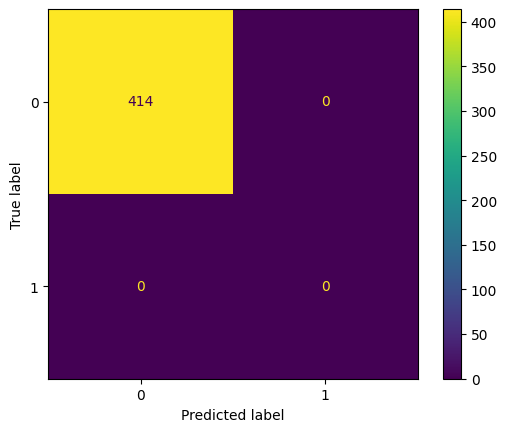

In [37]:
ConfusionMatrixDisplay(np.array([valid[0]['confusion_matrix'][-i][0:2] for i in range(2)])).plot()

In [6]:
def takeRocCurve(metrics: list) -> plt:
    fpr, tpr, thresholds = metrics[0]["roc_curve"]
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.8f})')
    plt.plot([-0.01, 1.01], [-0.01, 1.01], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

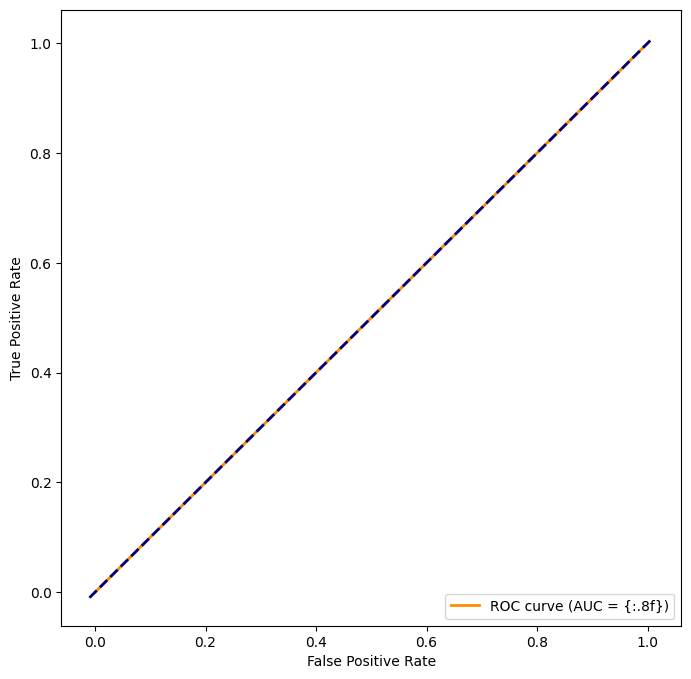

In [7]:
takeRocCurve(valid)